In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from IPython.display import Image
plt.rcParams.update({'font.size': 16})

In [26]:
path_conf = "/home/giacomo/comp_bio/cbp_final/data_3eig/02_processed/02_npt/conf_onlyprot.pdb"
path_traj = "/home/giacomo/comp_bio/cbp_final/data_3eig/02_processed/02_npt/traj_onlyprot.xtc"
path_out = "/home/giacomo/comp_bio/cbp_final/data_3eig/03_analyzed/graphs/"
path_ini = path_out
path_pdb = path_conf

In [60]:
def plot_heatmap(matrix,
                title = "title",
                xlabel = "Columns",
                ylabel = "Rows",
                clabel="value"):
    """
    Plots a heatmap for a given NumPy matrix with a colorbar.

    Parameters:
        matrix (numpy.ndarray): 2D array to visualize as a heatmap.
    """
    plt.figure(figsize=(6, 5))
    heatmap = plt.imshow(matrix, cmap='inferno_r', aspect='auto')
    plt.colorbar(heatmap, label=clabel)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Calculation of interactions

In [28]:
os.system(f" pyinteraph -s {path_conf} -t {path_traj} -r {path_pdb} \
            --sb-co 5 -b --sb-graph {path_out}sb-graph.dat --ff-masses charmm27 \
            -v --sb-cg-file {path_ini}charged_groups.ini")

INFO: 18 LYS (CE, NZ, HZ1, HZ2, HZ3)
INFO: 21 ASP (CG, OD1, OD2)
INFO: 28 ARG (CD, NE, CZ, NH1, HH11, HH12, NH2, HH21, HH22)
INFO: 30 GLU (CD, OE1, OE2)
INFO: 31 ARG (CD, NE, CZ, NH1, HH11, HH12, NH2, HH21, HH22)
INFO: 32 ARG (CD, NE, CZ, NH1, HH11, HH12, NH2, HH21, HH22)
INFO: 35 GLU (CD, OE1, OE2)
INFO: 36 ARG (CD, NE, CZ, NH1, HH11, HH12, NH2, HH21, HH22)
INFO: 44 GLU (CD, OE1, OE2)
INFO: 46 LYS (CE, NZ, HZ1, HZ2, HZ3)
INFO: 54 LYS (CE, NZ, HZ1, HZ2, HZ3)
INFO: 55 LYS (CE, NZ, HZ1, HZ2, HZ3)
INFO: 62 GLU (CD, OE1, OE2)
INFO: 63 LYS (CE, NZ, HZ1, HZ2, HZ3)
INFO: 65 ARG (CD, NE, CZ, NH1, HH11, HH12, NH2, HH21, HH22)
INFO: 68 LYS (CE, NZ, HZ1, HZ2, HZ3)
INFO: 70 ARG (CD, NE, CZ, NH1, HH11, HH12, NH2, HH21, HH22)
INFO: 77 ARG (CD, NE, CZ, NH1, HH11, HH12, NH2, HH21, HH22)
INFO: 78 GLU (CD, OE1, OE2)
INFO: 80 LYS (CE, NZ, HZ1, HZ2, HZ3)
INFO: 81 GLU (CD, OE1, OE2)
INFO: 91 ARG (CD, NE, CZ, NH1, HH11, HH12, NH2, HH21, HH22)
INFO: 94 ASP (CG, OD1, OD2)
INFO: 95 ASP (CG, OD1, OD2)
INFO: 98 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching coordinates...
INFO: Caching 

0

In [29]:
os.system(f" pyinteraph -s {path_conf} -t {path_traj} -r {path_pdb} \
            -y --hb-graph {path_out}hb-graph.dat --ff-masses charmm27 \
            -v --hb-ad-file {path_ini}hydrogen_bonds.ini")

INFO: Will use 'name OH or name OG or name NE2 or name OG1 or name NE or name N or name ND1 or name NZ or name NH1 or name NH2 or name OW or name ND2 or name SG or name OH2 or name NE1' as selection for donors.
INFO: Will use 'name OH or name OG or name OD1 or name OD2 or name OG1 or name O or name ND1 or name NE2 or name OE2 or name OW or name SG or name OE1 or name OH2 or name SD' as selection for acceptors.
INFO: Running the hydrogen bonds analysis...
INFO: Choosing frames to analyze
INFO: Starting preparation
INFO: Finishing up
INFO: Done! Finalizing...


0

In [30]:
os.system(f" pyinteraph -s {path_conf} -t {path_traj} -r {path_pdb} \
            --hc-co 5 -f --hc-graph {path_out}hc-graph.dat --ff-masses charmm27 \
            -v --hc-residues ALA,VAL,LEU,ILE,PHE,PRO,MET,TRP")

INFO: Selecting residues: ALA, VAL, LEU, ILE, PHE, PRO, MET, TRP
INFO: Chosen selections:
INFO: 9 ALA (HN, HA, CB, HB1, HB2, HB3)
INFO: 86 ALA (HN, HA, CB, HB1, HB2, HB3)
INFO: 96 ALA (HN, HA, CB, HB1, HB2, HB3)
INFO: 106 ALA (HN, HA, CB, HB1, HB2, HB3)
INFO: 124 ALA (HN, HA, CB, HB1, HB2, HB3)
INFO: 1 VAL (HT1, HT2, HT3, HA, CB, HB, CG1, HG11, HG12, HG13, CG2, HG21, HG22, HG23)
INFO: 8 VAL (HN, HA, CB, HB, CG1, HG11, HG12, HG13, CG2, HG21, HG22, HG23)
INFO: 10 VAL (HN, HA, CB, HB, CG1, HG11, HG12, HG13, CG2, HG21, HG22, HG23)
INFO: 43 VAL (HN, HA, CB, HB, CG1, HG11, HG12, HG13, CG2, HG21, HG22, HG23)
INFO: 50 VAL (HN, HA, CB, HB, CG1, HG11, HG12, HG13, CG2, HG21, HG22, HG23)
INFO: 74 VAL (HN, HA, CB, HB, CG1, HG11, HG12, HG13, CG2, HG21, HG22, HG23)
INFO: 109 VAL (HN, HA, CB, HB, CG1, HG11, HG12, HG13, CG2, HG21, HG22, HG23)
INFO: 112 VAL (HN, HA, CB, HB, CG1, HG11, HG12, HG13, CG2, HG21, HG22, HG23)
INFO: 115 VAL (HN, HA, CB, HB, CG1, HG11, HG12, HG13, CG2, HG21, HG22, HG23)
INFO: 12

0

# Cutoff plots

## Salt bridges

In [31]:
os.system(f"filter_graph -d {path_out}sb-graph_all.dat -c {path_out}cluster_size_sb.dat \
            -p {path_out}clusters_plot_sb.png")

No handles with labels found to put in legend.


0

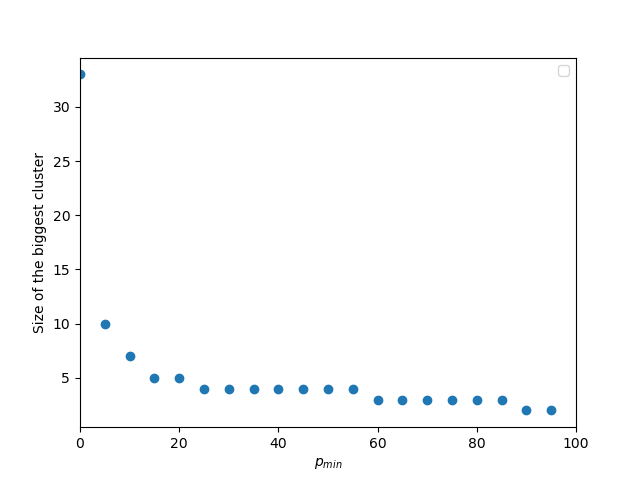

In [32]:
Image(f"{path_out}clusters_plot_sb.png")

## Hydrogen bonds

In [33]:
os.system(f"filter_graph -d {path_out}hb-graph_all.dat -c {path_out}cluster_size_hb.dat \
            -p {path_out}clusters_plot_hb.png")

No handles with labels found to put in legend.


0

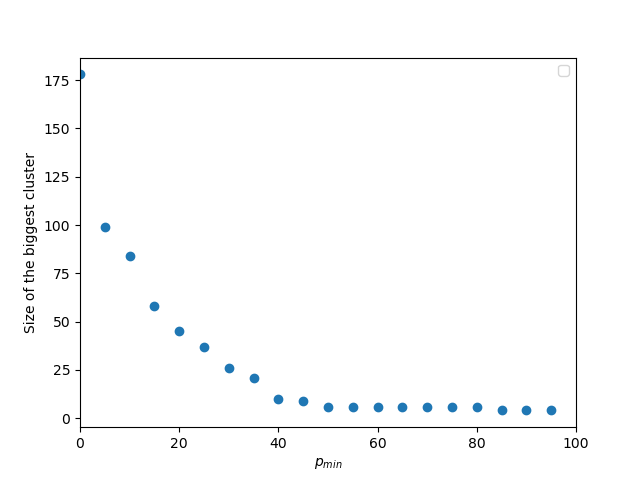

In [34]:
Image(f"{path_out}clusters_plot_hb.png")

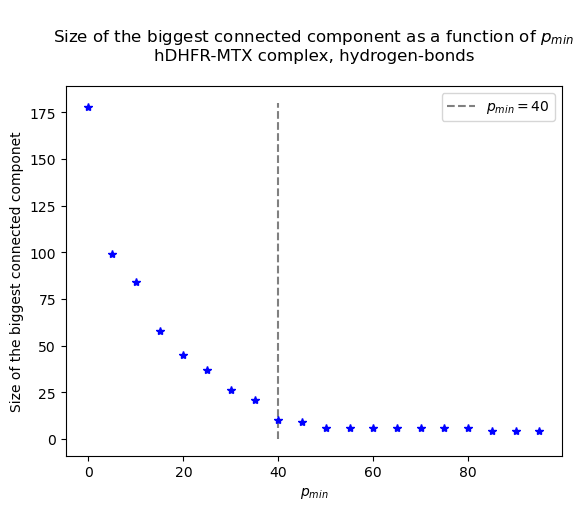

In [53]:
cluster_size_hb_path = "/home/giacomo/comp_bio/cbp_final/data_3eig/03_analyzed/graphs/cluster_size_hb.dat"
cluster_size_hb = np.loadtxt(cluster_size_hb_path, skiprows=1)
plt.plot(cluster_size_hb[:, 0], cluster_size_hb[:, 1], '*b')
plt.vlines(40, 0, 180, colors="grey", linestyles="dashed", label=r"$p_{min} = 40$")
plt.legend()
title = r"""
Size of the biggest connected component as a function of $p_{min}$
hDHFR-MTX complex, hydrogen-bonds
"""
plt.title(title)
plt.xlabel(r"$p_{min}$")
plt.ylabel("Size of the biggest connected componet")
plt.show()

## Hydrofobic interactions

In [35]:
os.system(f"filter_graph -d {path_out}hc-graph_all.dat -c {path_out}cluster_size_hc.dat \
            -p {path_out}clusters_plot_hc.png")

No handles with labels found to put in legend.


0

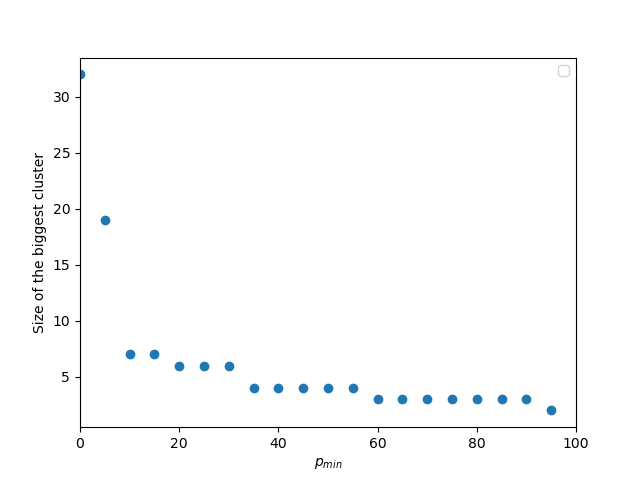

In [36]:
Image(f"{path_out}clusters_plot_hc.png")

# Filtering the graphs

In [37]:
os.system(f" filter_graph -d {path_out}hb-graph_all.dat -o {path_out}hb-graph_filtered.dat -t 20.0")

0

In [38]:
os.system(f" filter_graph -d {path_out}sb-graph_all.dat -o {path_out}sb-graph_filtered.dat -t 30.0")

0

In [39]:
os.system(f" filter_graph -d {path_out}hc-graph_all.dat -o {path_out}hc-graph_filtered.dat -t 20.0")

0

# Macro IIN

## Unweighted

In [40]:
os.system(f" filter_graph -d {path_out}hb-graph_filtered.dat -d {path_out}hc-graph_filtered.dat \
             -d {path_out}sb-graph_filtered.dat -o {path_out}macro_IIN_unweighted.dat")

0

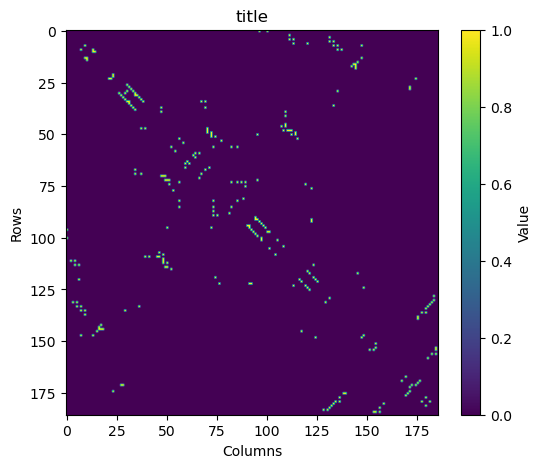

In [41]:
matrix = np.loadtxt(f"{path_out}macro_IIN_unweighted.dat", delimiter=" ")
plot_heatmap(matrix)

## Weighted

In [42]:
# generating the weights
os.system(f" pyinteraph -s {path_conf} -t {path_traj} -r {path_pdb} -p \
             --ff-masses charmm27 -v --kbp-graph {path_out}kbp-graph.dat")

INFO: Loading potential definition...
INFO: Found 190 residue-residue interaction definitions.
INFO: Loading input files...


0

In [43]:
os.system(f" filter_graph -d {path_out}hb-graph_filtered.dat -d {path_out}hc-graph_filtered.dat \
             -d {path_out}sb-graph_filtered.dat -o {path_out}macro_IIN_weighted.dat -w {path_out}kbp-graph.dat")

0

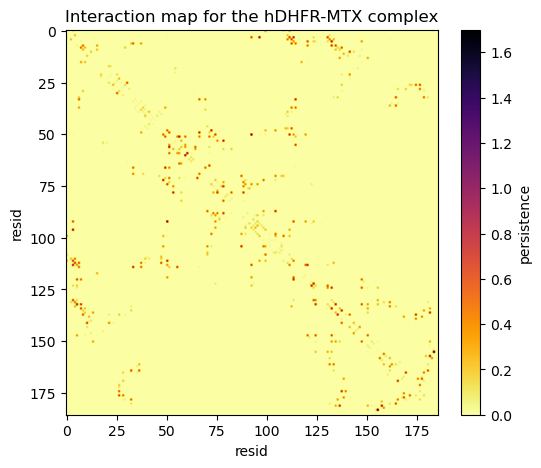

In [61]:
matrix_weighted = np.loadtxt(f"{path_out}macro_IIN_weighted.dat", delimiter=" ")
plot_heatmap(np.abs(matrix_weighted),
            title = "Interaction map for the hDHFR-MTX complex",
            xlabel="resid",
            ylabel="resid",
            clabel="persistence")

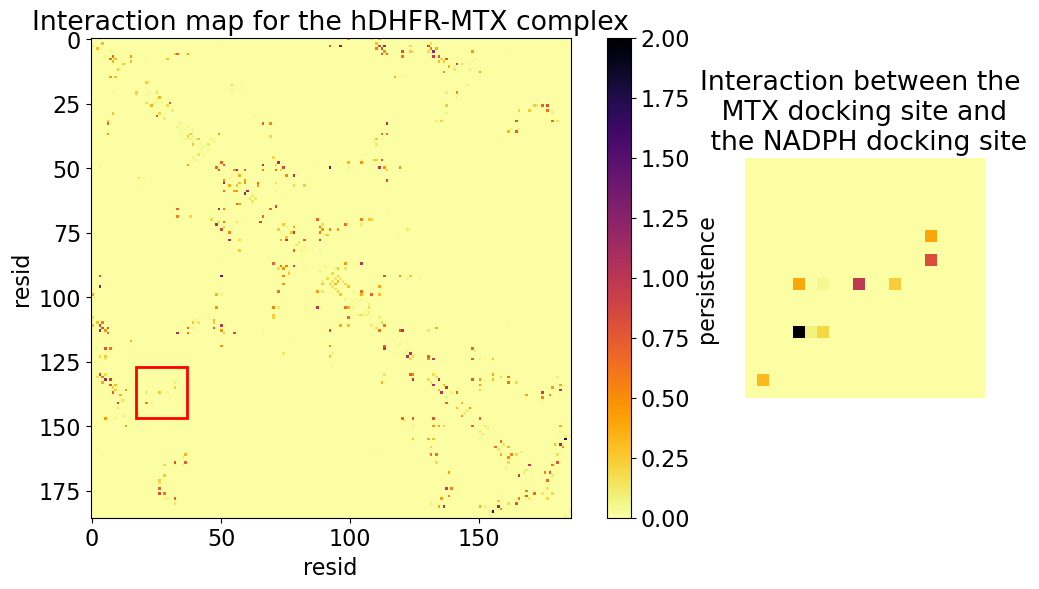

In [78]:
data = np.abs(matrix_weighted)

x_center, y_center, zoom_length = 137, 27, 20
x_start, x_end = x_center - zoom_length // 2, x_center + zoom_length // 2
y_start, y_end = y_center - zoom_length // 2, y_center + zoom_length // 2

# Create the figure and main heatmap axis
fig = plt.figure(figsize=(12, 6))
main_ax = fig.add_axes([0.1, 0.1, 0.6, 0.8])  # Left part for the main heatmap
zoom_ax = fig.add_axes([0.7, 0.3, 0.25, 0.4])  # Right part for the zoomed heatmap

# Plot the main heatmap
cax = main_ax.imshow(data, cmap='inferno_r', interpolation='nearest', vmin=0, vmax=2)
main_ax.set_title("Interaction map for the hDHFR-MTX complex")
main_ax.set_xlabel("resid")
main_ax.set_ylabel("resid")


# Add a rectangle to highlight the zoomed-in area
rect = plt.Rectangle((y_start, x_start), zoom_length, zoom_length,
                     edgecolor='red', facecolor='none', linewidth=2)
main_ax.add_patch(rect)

# Add a colorbar for the main heatmap
fig.colorbar(cax, ax=main_ax, orientation='vertical', label="persistence")

# Plot the zoomed-in heatmap
zoom_ax.imshow(data[x_start:x_end, y_start:y_end], cmap='inferno_r', interpolation='nearest')
zoom_ax.set_title("Interaction between the \n MTX docking site and \n the NADPH docking site")
zoom_ax.axis('off')  # Hide the axes for clarity

# Display the figure
plt.show()

# Connected components

In [45]:
os.system(f" graph_analysis -a {path_out}macro_IIN_weighted.dat \
             -r {path_pdb} -c -cb {path_out}ccs.pdb")

Graph loaded! 186 nodes, 408 edges
Node list: 
seg_-1VAL
seg_-10VAL
seg_-100THR
seg_-101GLU
seg_-102GLN
seg_-103PRO
seg_-104GLU
seg_-105LEU
seg_-106ALA
seg_-107ASN
seg_-108LYS
seg_-109VAL
seg_-11SER
seg_-110ASP
seg_-111MET
seg_-112VAL
seg_-113TRP
seg_-114ILE
seg_-115VAL
seg_-116GLY
seg_-117GLY
seg_-118SER
seg_-119SER
seg_-12GLN
seg_-120VAL
seg_-121TYR
seg_-122LYS
seg_-123GLU
seg_-124ALA
seg_-125MET
seg_-126ASN
seg_-127HSD
seg_-128PRO
seg_-129GLY
seg_-13ASN
seg_-130HSD
seg_-131LEU
seg_-132LYS
seg_-133LEU
seg_-134PHE
seg_-135VAL
seg_-136THR
seg_-137ARG
seg_-138ILE
seg_-139MET
seg_-14MET
seg_-140GLN
seg_-141ASP
seg_-142PHE
seg_-143GLU
seg_-144SER
seg_-145ASP
seg_-146THR
seg_-147PHE
seg_-148PHE
seg_-149PRO
seg_-15GLY
seg_-150GLU
seg_-151ILE
seg_-152ASP
seg_-153LEU
seg_-154GLU
seg_-155LYS
seg_-156TYR
seg_-157LYS
seg_-158LEU
seg_-159LEU
seg_-16ILE
seg_-160PRO
seg_-161GLU
seg_-162TYR
seg_-163PRO
seg_-164GLY
seg_-165VAL
seg_-166LEU
seg_-167SER
seg_-168ASP
seg_-169VAL
seg_-17GLY
seg_-170GLN
seg

0

# Hubs

In [46]:
os.system(f" graph_analysis -a {path_out}macro_IIN_weighted.dat \
             -r {path_pdb} -u -ub {path_out}hubs.pdb -k 3")

Graph loaded! 186 nodes, 408 edges
Node list: 
seg_-1VAL
seg_-10VAL
seg_-100THR
seg_-101GLU
seg_-102GLN
seg_-103PRO
seg_-104GLU
seg_-105LEU
seg_-106ALA
seg_-107ASN
seg_-108LYS
seg_-109VAL
seg_-11SER
seg_-110ASP
seg_-111MET
seg_-112VAL
seg_-113TRP
seg_-114ILE
seg_-115VAL
seg_-116GLY
seg_-117GLY
seg_-118SER
seg_-119SER
seg_-12GLN
seg_-120VAL
seg_-121TYR
seg_-122LYS
seg_-123GLU
seg_-124ALA
seg_-125MET
seg_-126ASN
seg_-127HSD
seg_-128PRO
seg_-129GLY
seg_-13ASN
seg_-130HSD
seg_-131LEU
seg_-132LYS
seg_-133LEU
seg_-134PHE
seg_-135VAL
seg_-136THR
seg_-137ARG
seg_-138ILE
seg_-139MET
seg_-14MET
seg_-140GLN
seg_-141ASP
seg_-142PHE
seg_-143GLU
seg_-144SER
seg_-145ASP
seg_-146THR
seg_-147PHE
seg_-148PHE
seg_-149PRO
seg_-15GLY
seg_-150GLU
seg_-151ILE
seg_-152ASP
seg_-153LEU
seg_-154GLU
seg_-155LYS
seg_-156TYR
seg_-157LYS
seg_-158LEU
seg_-159LEU
seg_-16ILE
seg_-160PRO
seg_-161GLU
seg_-162TYR
seg_-163PRO
seg_-164GLY
seg_-165VAL
seg_-166LEU
seg_-167SER
seg_-168ASP
seg_-169VAL
seg_-17GLY
seg_-170GLN
seg

0

# Generating graphs

In [47]:
os.system(f" dat2graphml -a {path_out}macro_IIN_weighted.dat -r {path_pdb} -o {path_out}graph.graphml")

0